# Comparison between AMR-Wind and Nalu-Wind
## Stable 5 m/s case

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import load_alldata
import numpy as np
import matplotlib.pyplot as plt

#from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
# Provide locations and parameters of data
l_cases = {
    'amrwind-ksgs-coarse':load_alldata.AMRWind2Stats('../../AMRWindRuns/stable/05ms'),
    'amrwind-ksgs-fine'  :load_alldata.AMRWind2Stats('../../AMRWindRuns/stable/05ms', 
                                                     lineavgfilename='line_average_data_fine.csv'),
    'naluwind-ksgs-dz6.0':load_alldata.NaluWindStats('../../NaluWindRuns/stable/05ms/05ms_iter01/'),
    'naluwind-ksgs-dz2.5':load_alldata.NaluWindStats('../../NaluWindRuns/stable/05ms/05ms_iter02/'),
}

In [3]:
# What kind of line styles to use in the plots
styles = {
    'amrwind-ksgs-coarse':    {'color':'r',         'lw':2, 'ls':'-',  'plotspectra':False},
    'amrwind-ksgs-fine':      {'color':'r',         'lw':2, 'ls':'--',  'plotspectra':False},
    'naluwind-ksgs-dz6.0':    {'color':'b',         'lw':2, 'ls':'-',  'plotspectra':True},
    'naluwind-ksgs-dz2.5':    {'color':'b',         'lw':2, 'ls':'--',  'plotspectra':True},
}

# Add the hub-height lines
hubheights = [20.0]

## Plot velocity profile

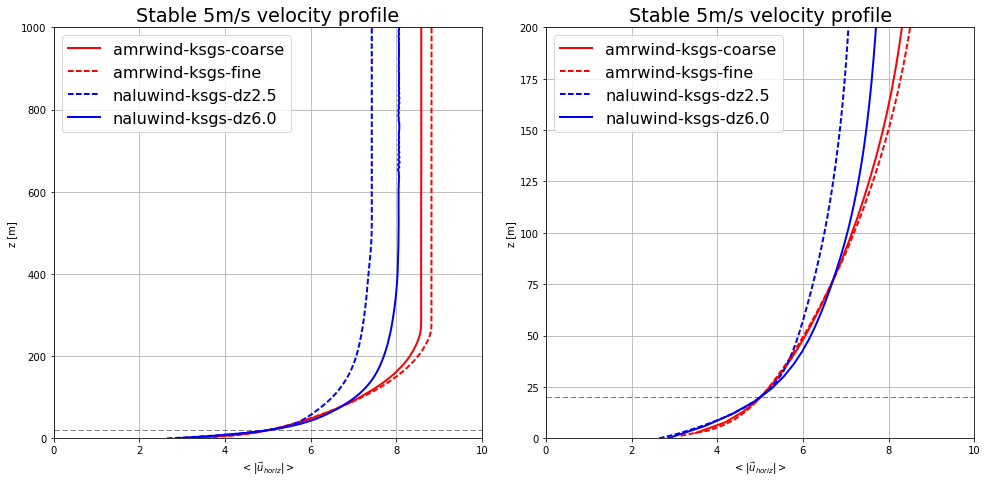

In [4]:
#fig = plt.figure(figsize=(10,8))
fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    for i in [0,1]: axs[i].plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in [0,1]: axs[i].hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

for i in [0,1]:
    axs[i].set_xlabel(r'$< | \vec{u}_{horiz} | >$')
    axs[i].set_ylabel('z [m]')
    axs[i].set_xlim(0,10)
    axs[i].legend(loc=0)
    axs[i].grid()
    axs[i].set_title('Stable 5m/s velocity profile')

axs[0].set_ylim(0,1000)
axs[1].set_ylim(0,200)

plt.tight_layout()

## Plot wind direction

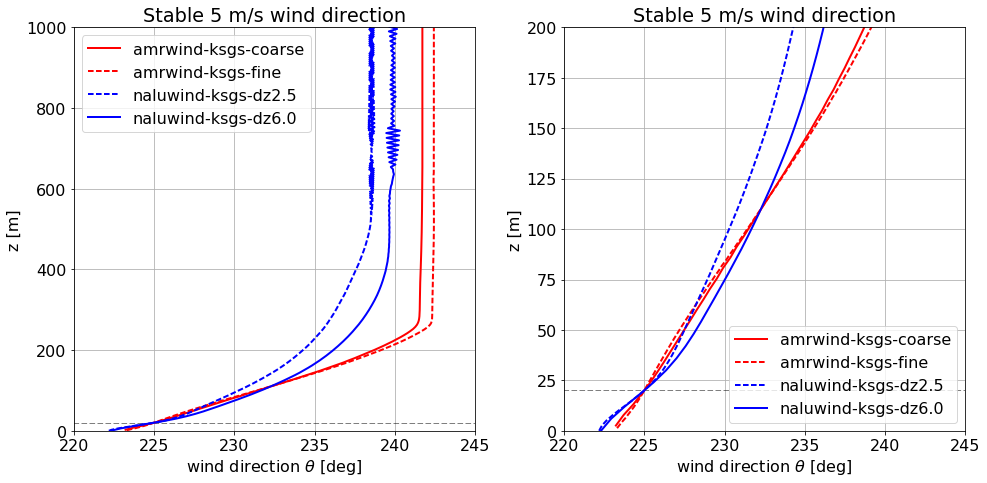

In [5]:
#fig = plt.figure(figsize=(10,8))
fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
plt.rc('font', size=16)
veer = lambda u, v: 270-np.arctan2(v, u)*180.0/np.pi
for l,c in l_cases.items():
    ls=styles[l]
    try: 
        #plt.plot(veer(c.u, c.v), c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
        for i in [0,1]: axs[i].plot(veer(c.u, c.v), c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    except:
        pass

for hh in hubheights: 
    for i in [0,1]: axs[i].hlines(hh, 200, 300, linestyles='dashed', linewidth=0.5)

for i in [0,1]:
    axs[i].set_xlabel(r'wind direction $\theta$ [deg]')
    axs[i].set_ylabel('z [m]')
    axs[i].legend(loc=0)
    axs[i].set_xlim(220, 245)
    axs[i].grid()
    axs[i].set_title('Stable 5 m/s wind direction')

axs[0].set_ylim(0,1000)
axs[1].set_ylim(0,200)
plt.tight_layout()


## Plot the TI

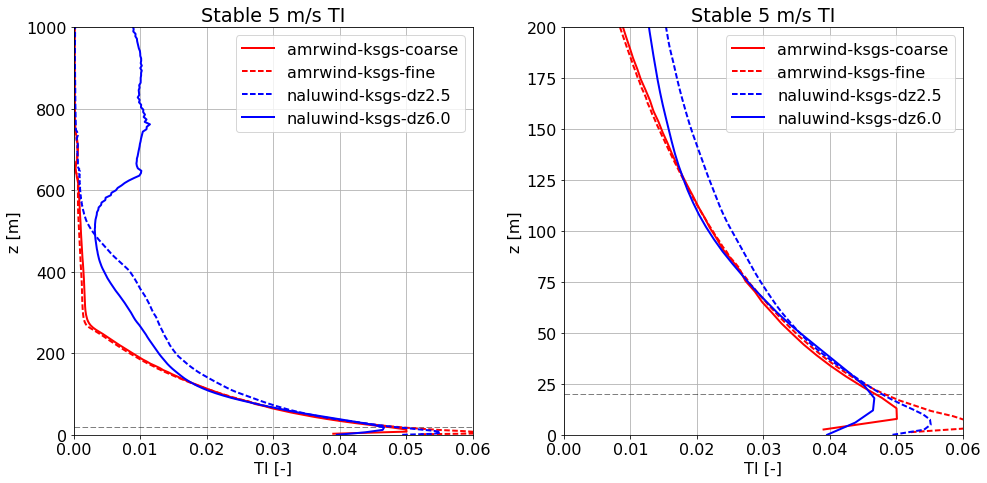

In [6]:
#TIcalc = lambda uu, vv, ww, U: np.sqrt(2.0/3.0*0.5(uu+vv+ww))/U
TIcalc = lambda uu, vv, ww, U: np.sqrt(2.0/3.0*0.5*(uu+vv+ww))/U

fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    cTI = TIcalc(c.vel_var["<u'u'>"], c.vel_var["<v'v'>"], c.vel_var["<w'w'>"], c.hvelmag)
    for i in [0,1]: axs[i].plot(cTI, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in [0,1]: axs[i].hlines(hh, 0, 0.075, linestyles='dashed', linewidth=0.5)


for i in [0,1]:
    axs[i].set_xlabel(r'TI [-]')
    axs[i].set_ylabel('z [m]')
    axs[i].legend(loc=0)
    axs[i].set_xlim(0, 0.06)
    axs[i].grid()
    axs[i].set_title('Stable 5 m/s TI')

axs[0].set_ylim(0,1000)
axs[1].set_ylim(0,200)
plt.tight_layout()

## Plot Temperature

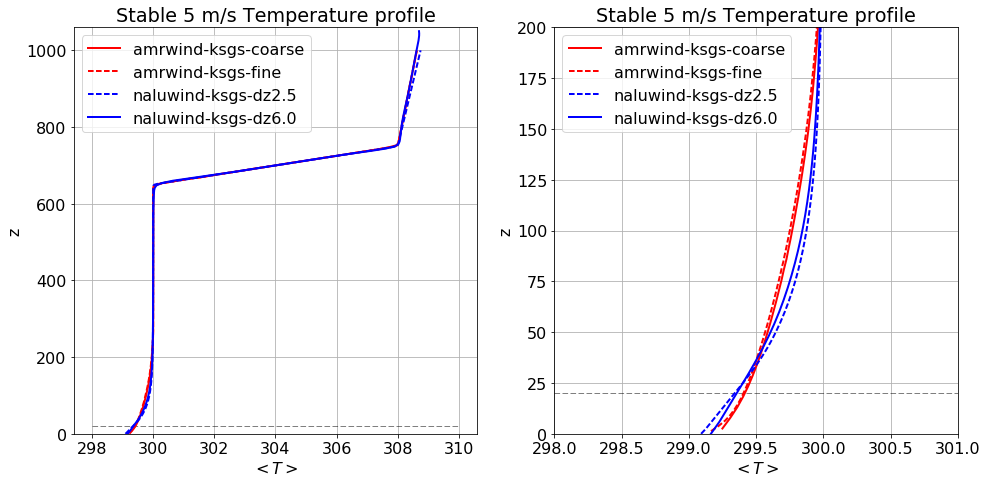

In [7]:
#fig = plt.figure(figsize=(10,8))
fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    for i in [0,1]: axs[i].plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in [0,1]: axs[i].hlines(hh, 298, 310, linestyles='dashed', linewidth=0.5)
    
axs[0].set_xlabel(r'$<T>$')
axs[0].set_ylabel('z')
axs[0].legend(loc=0)
#axs[0].set_ylim(1020,1060); axs[0].set_xlim(308.6,308.75)
axs[0].set_ylim(0,1060)
axs[0].grid()
axs[0].set_title('Stable 5 m/s Temperature profile')

axs[1].set_xlabel(r'$<T>$')
axs[1].set_ylabel('z')
axs[1].legend(loc=0)
axs[1].set_xlim(298,301)
axs[1].set_ylim(0,200)
axs[1].grid()
axs[1].set_title('Stable 5 m/s Temperature profile')

plt.tight_layout()

## Plot reynolds stresses

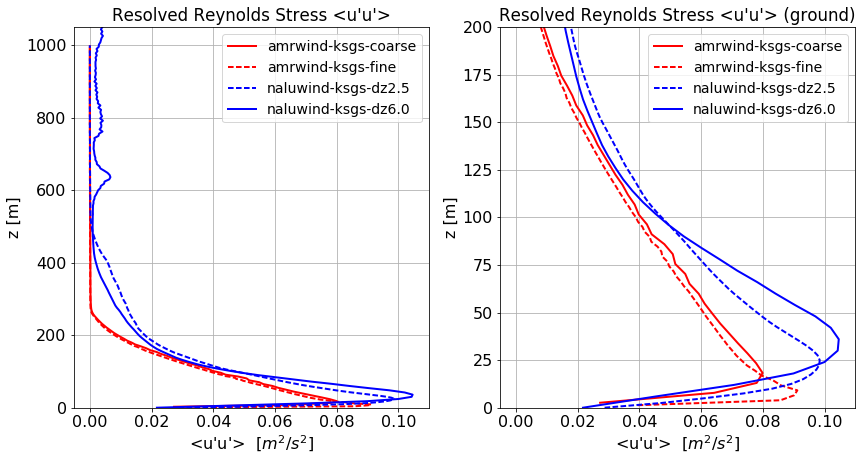

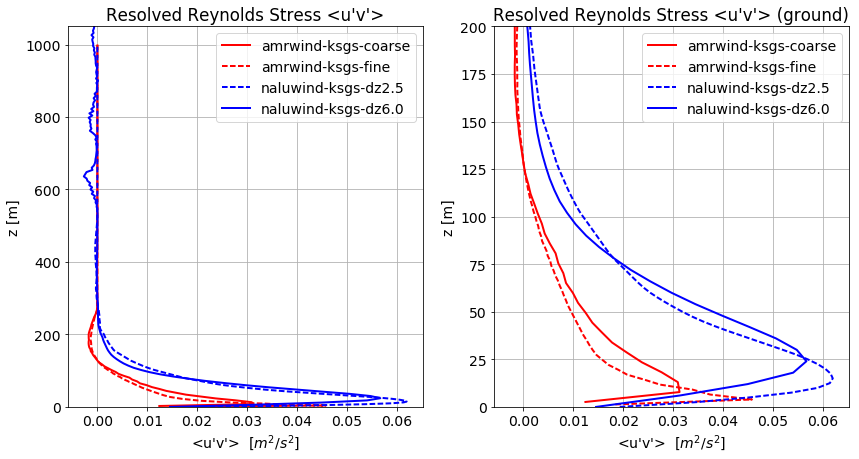

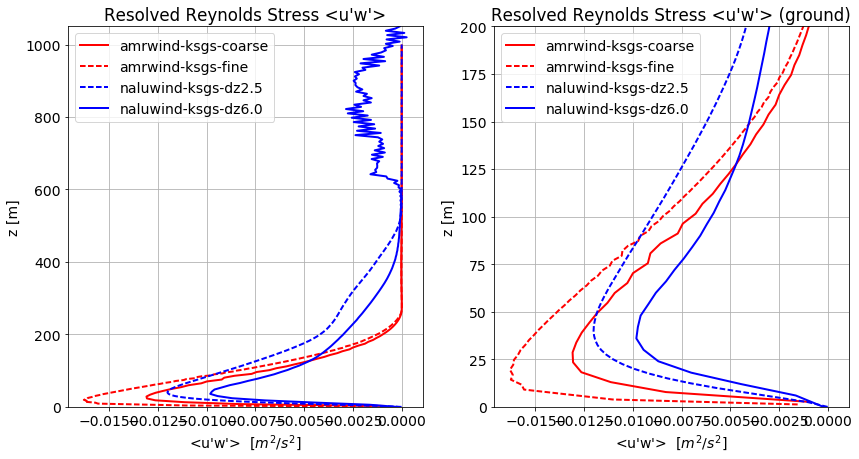

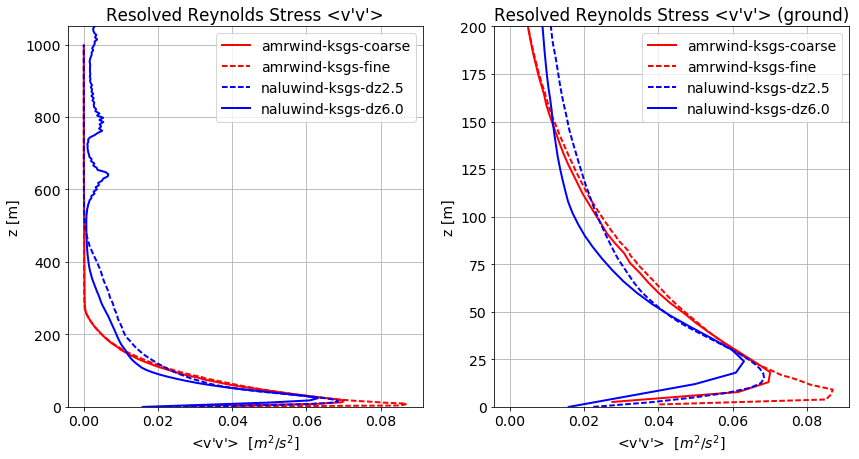

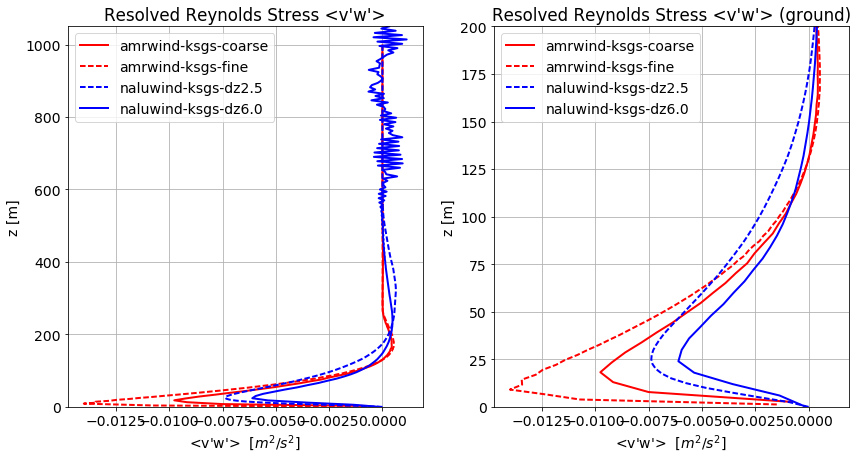

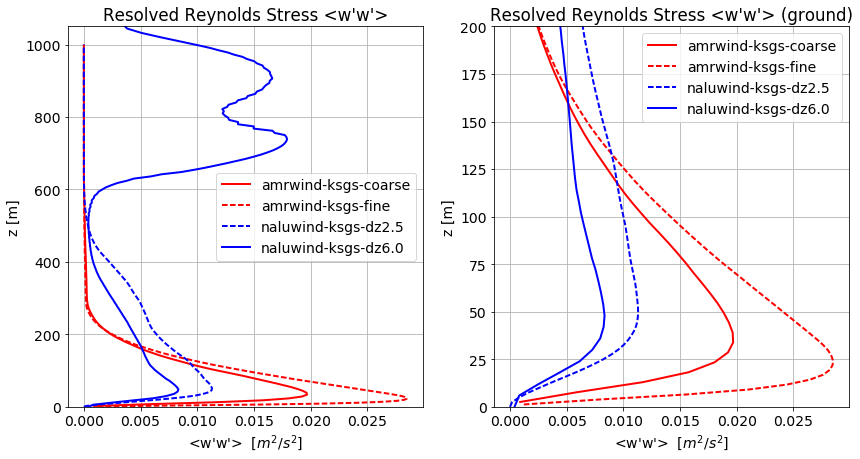

In [8]:
# Plot these stresses in this order
plotstresses=["<u'u'>", "<u'v'>", "<u'w'>", "<v'v'>", "<v'w'>", "<w'w'>"]

for stress in plotstresses:
    #fig = plt.figure(figsize=(7,7))
    fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
    plt.rc('font', size=14)
    for l,c in l_cases.items():
        ls=styles[l]
        if (len(c.vel_var[stress])>0): 
            axs[0].plot(c.vel_var[stress], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
            axs[1].plot(c.vel_var[stress], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    axs[0].legend()
    axs[0].set_ylabel('z [m]')
    axs[0].set_xlabel(stress+'  [$m^2/s^2$]')
    axs[0].set_ylim([0,1050])
    axs[0].grid()
    axs[0].set_title('Resolved Reynolds Stress '+stress)
    
    axs[1].legend()
    axs[1].set_ylabel('z [m]')
    axs[1].set_xlabel(stress+'  [$m^2/s^2$]')
    axs[1].set_ylim([0,200])
    axs[1].grid()
    axs[1].set_title('Resolved Reynolds Stress '+stress+' (ground)')



## Plot temperature fluxes

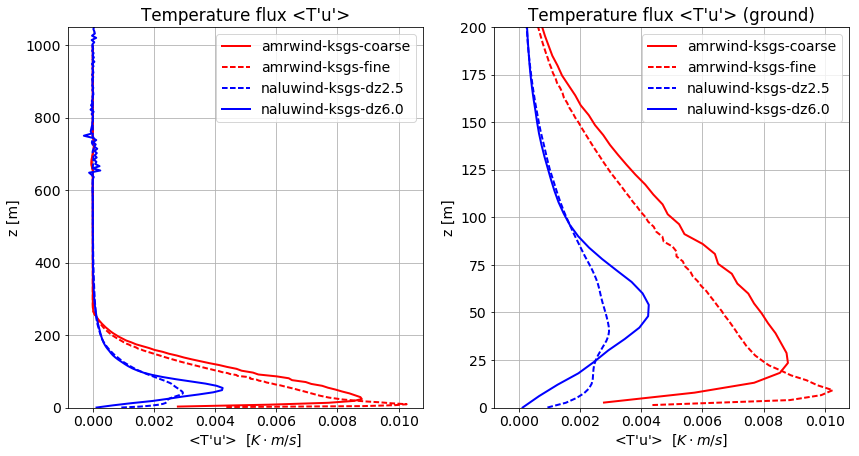

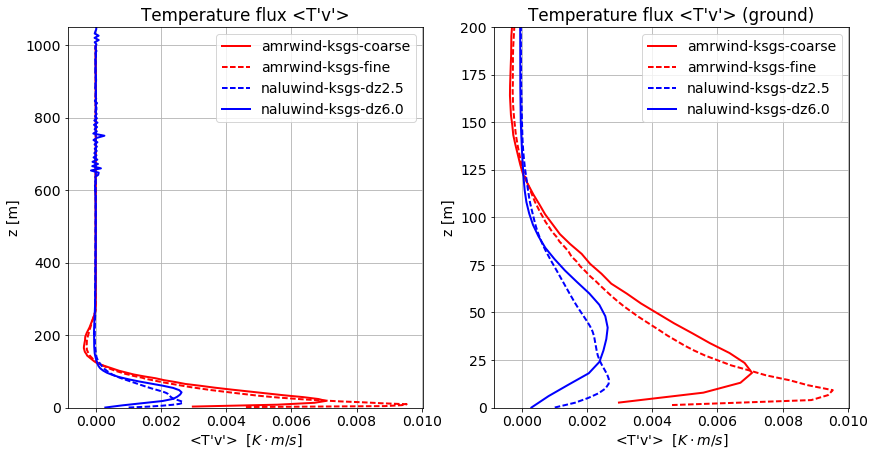

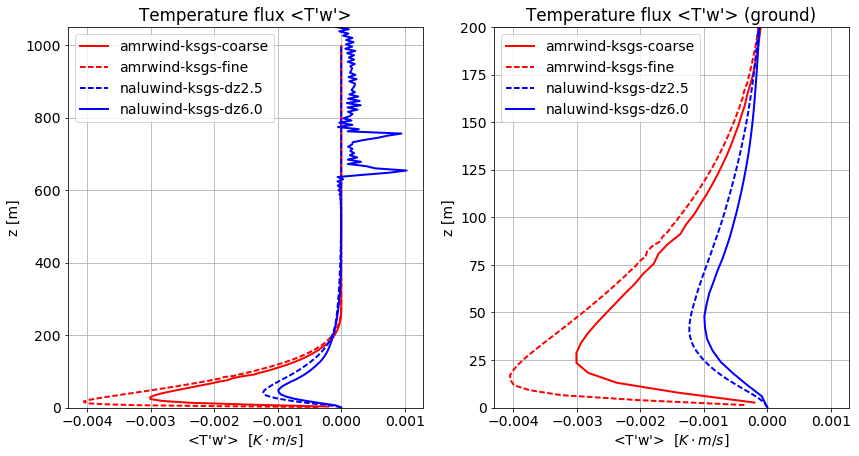

In [9]:
# Plot these stresses in this order
plotTfluxes=["<T'u'>", "<T'v'>", "<T'w'>"]

for flux in plotTfluxes:
    #fig = plt.figure(figsize=(7,7))
    fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
    plt.rc('font', size=14)
    for l,c in l_cases.items():
        ls=styles[l]
        if (len(c.vel_var[stress])>0): 
            axs[0].plot(c.tflux_var[flux], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
            axs[1].plot(c.tflux_var[flux], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    axs[0].legend()
    axs[0].set_ylabel('z [m]')
    axs[0].set_xlabel(flux+'  [$K \cdot m/s$]')
    axs[0].set_ylim([0,1050])
    axs[0].grid()
    axs[0].set_title('Temperature flux '+flux)
    
    axs[1].legend()
    axs[1].set_ylabel('z [m]')
    axs[1].set_xlabel(flux+'  [$K \cdot m/s$]')
    axs[1].set_ylim([0,200])
    axs[1].grid()
    axs[1].set_title('Temperature flux '+flux+' (ground)')